In [2]:
import numpy as np
from scipy.stats import dirichlet, multinomial
%matplotlib inline
from matplotlib import pyplot as plt
from ipywidgets import interact
import ipywidgets as widgets

In [3]:
# Mode of the posterior i.e. MAP estimate
alpha = [15, 50, 30, 20, 10, 5]
N = [15, 50, 30, 20, 10, 5]  # These values are set for experimentational purpose
alpha = np.array(alpha) + np.array(N)
theta_map = [x/np.sum(alpha) for x in alpha]
density = dirichlet.pdf(theta_map, alpha=alpha)
print(density)

5004471.082768597


In [4]:
# Plot the posterior predictive distribution approximated using sampling

# @interact(a1=(1,300), a2=(1,300), N1=(100,500,100), N2=(100,500,100))
def plot_future_heads(alpha, N):
    alpha = np.array(alpha) + np.array(N)
    N_samples = 1000
    x = np.zeros([N_samples, 6])
    for i in range(N_samples):
        ran_theta = np.random.dirichlet(alpha=alpha, size=[1]).tolist()
        x[i] = np.random.multinomial(n=np.sum(N), pvals=ran_theta[0], size=[1])
    
    fig, axes = plt.subplots(2, 3, figsize=(13, 4))
    count = 0
    for i in range(2):
        for j in range(3):
            axes[i, j].hist(x[:, count], rwidth=0.8)
            count += 1
    #plt.xlabel('Heads')
    #plt.ylabel('Probability of heads in future trial')
    plt.show()
    

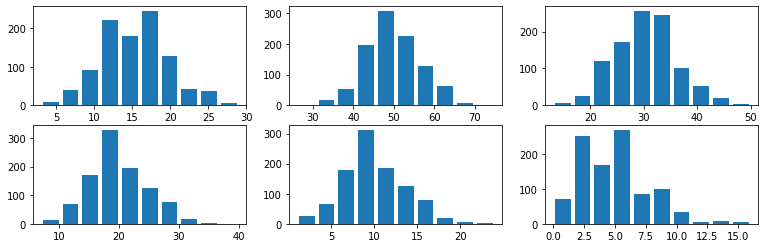

In [5]:
alpha = [15, 50, 30, 20, 10, 5]
samples = [15, 50, 30, 20, 10, 5]  # These values are set for experimentational purpose
plot_future_heads(alpha=alpha, N=samples)

In [6]:
# alpha = [15, 50, 30, 20, 10, 5]
# N = [15, 50, 30, 20, 10, 5]  # These values are set for experimentational purpose